# **Predictive Analytics: Harga Beras Medium**


---



## **Deskripsi Proyek**

### **Latar Belakang**

Harga rumah merupakan salah satu aspek krusial dalam industri properti. Calon pembeli, investor, maupun developer membutuhkan informasi estimasi harga rumah berdasarkan karakteristik tertentu seperti luas bangunan, jumlah kamar, hingga kapasitas garasi. Prediksi harga rumah yang akurat dapat membantu pengambilan keputusan investasi serta menentukan strategi pemasaran properti.

## **1. Import Library yang Dibutuhkan**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **2. Data Understanding**

Bagian ini merupakan proses mulai dari memuat sampai dengan meninjau dataset yang akan dianalisis dalam proyek prediksi harga rumah. Tujuannya dari proses ini memahami dan mendapatkan gambaran secara umum mengenai struktur data, isi data, dan kualitas data, sehingga dapat membantu proses persiapan data dan pembangunan model

### **Data Loading**

In [ ]:
url = "https://raw.githubusercontent.com/Meio047/Predictive-Analytics/refs/heads/main/data_rumah.csv"
df = pd.read_csv(url)

In [ ]:
df

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


### **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) merupakan proses eksplorasi untuk mengamati dan menganilis data untuk melihat pola, tren dan karakteristik data dalam dataset. Tujuannya untuk menemukan insight awal yang dapat membantu menentukan metode dan model yang dapat digunakan untuk analisis selanjutnya

### **EDA - Deskripsi Variabel**

In [ ]:
df = df.rename(columns={
    'NO': 'nomor',
    'NAMA RUMAH': 'nama_rumah',
    'HARGA': 'harga',
    'LB': 'lb',
    'LT': 'lt',
    'KT': 'kt',
    'KM': 'km',
    'GRS': 'grs'
})
df.head()

,nomor,nama_rumah,harga,lb,lt,kt,km,grs
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nomor       1010 non-null   int64 
 1   nama_rumah  1010 non-null   object
 2   harga       1010 non-null   int64 
 3   lb          1010 non-null   int64 
 4   lt          1010 non-null   int64 
 5   kt          1010 non-null   int64 
 6   km          1010 non-null   int64 
 7   grs         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


In [ ]:
df.describe()

,nomor,harga,lb,lt,kt,km,grs
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [ ]:
df.shape

(1010, 8)

Insight:

- Dataset terdiri dari 1010 baris data dengan 8 kolom yang merepresentasikan detail rumah yang akan dijual.

- Variabel yang ada meliputi:
    1. nomor : no
    2. nama_rumah : nama detail rumah
    3. harga : harga rumah
    4. lb : luas bangunan
    5. lt : luas tanah
    6. kt : jumlah kamar tidur
    7. km : jumlah kamar mandi
    8. grs : jumlah mobil yang dapat ditampung oleh garasi
    
- Dataset terdiri dari 1.010 data rumah yang dijual dengan 8 variabel. Tipe data yang terdapat adalah: satu variabel bertipe objek (string), tujuh variable bertipe integer(int64)



### **EDA - Menangani Missing Value dan Outliers**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
nomor,0
nama_rumah,0
harga,0
lb,0
lt,0
kt,0
km,0
grs,0


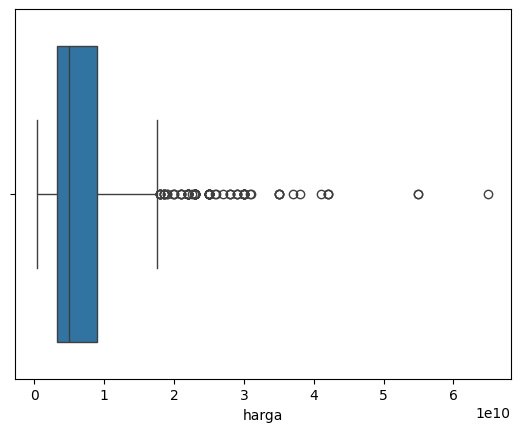

In [ ]:
plt.figure()
sns.boxplot(df, x='harga')
plt.show()

In [ ]:
Q1 = df['harga'].quantile(0.25)
Q3 = df['harga'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['harga'] < (Q1 - 1.5 * IQR)) | (df['harga'] > (Q3 + 1.5 * IQR)))]

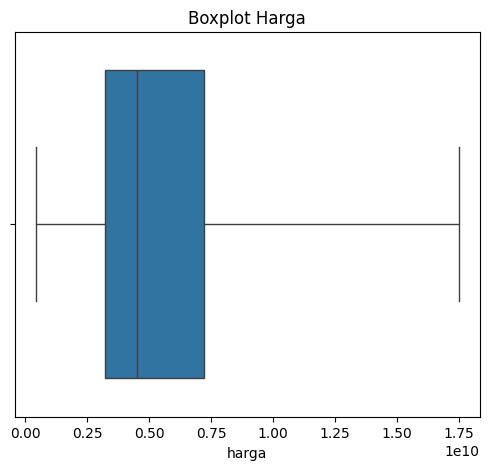

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='harga', whis=[0, 100])
plt.title("Boxplot Harga")
plt.show()

In [ ]:
df.shape

(916, 8)

Insight :
- Dataset tidak memiliki nilai duplikat dan tidak memiliki nilai yang hilang(missiing balue)
- Dengan visualisasi boxplot diatas `harga` memiliki outlier dan sudah ditangani menggunakan Inter Quartile Range (IQR)
`IQR = Q3 - Q1`

### **Univariate Analysis**

Tahapan ini bertujuan untuk melihat distribusi data masing masing fitur

In [ ]:
# Drop data yang tidak digunakan
df.drop(columns=['nomor', 'nama_rumah'], inplace=True, errors='ignore')

In [ ]:
#Mengganti satuan harga agar lebih readable
df['harga'] = (df['harga']/1000000).astype(int)

In [ ]:
df.head()

,harga,lb,lt,kt,km,grs
0,3800,220,220,3,3,0
1,4600,180,137,4,3,2
2,3000,267,250,4,4,4
3,430,40,25,2,2,0
4,9000,400,355,6,5,3


In [ ]:
q1 = df['harga'].quantile(0.25)
median = df['harga'].median()
q3 = df['harga'].quantile(0.75)

def classification_harga(harga):
    if harga <= q1:
        return 'Murah'
    elif harga <= median:
        return 'Menengah'
    else:
        return 'Mahal'

# Menambahkan kolom baru
df['tingkat_harga'] = df['harga'].apply(classification_harga)

df.head()

,harga,lb,lt,kt,km,grs,tingkat_harga
0,3800,220,220,3,3,0,Menengah
1,4600,180,137,4,3,2,Mahal
2,3000,267,250,4,4,4,Murah
3,430,40,25,2,2,0,Murah
4,9000,400,355,6,5,3,Mahal


<ipython-input-18-93f77c7e7eec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tingkat_harga', order=['Murah', 'Menengah', 'Mahal'], palette='rocket')


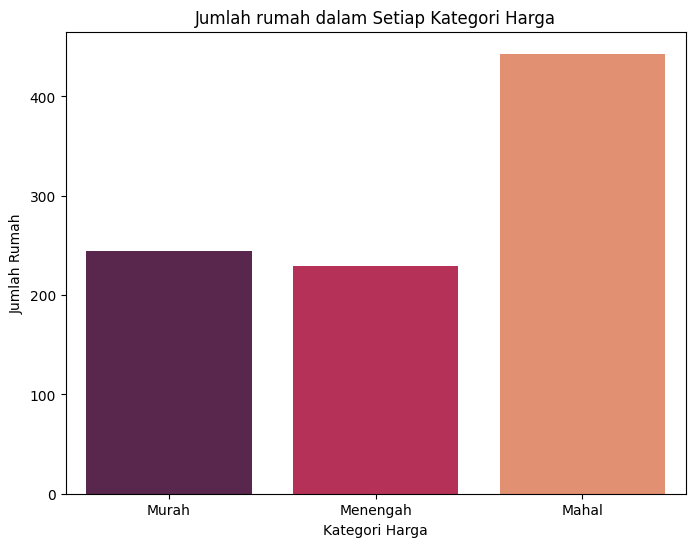

,count
tingkat_harga,
Mahal,443
Murah,244
Menengah,229


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tingkat_harga', order=['Murah', 'Menengah', 'Mahal'], palette='rocket')
plt.title('Jumlah rumah dalam Setiap Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Rumah')
plt.show()

df['tingkat_harga'].value_counts()

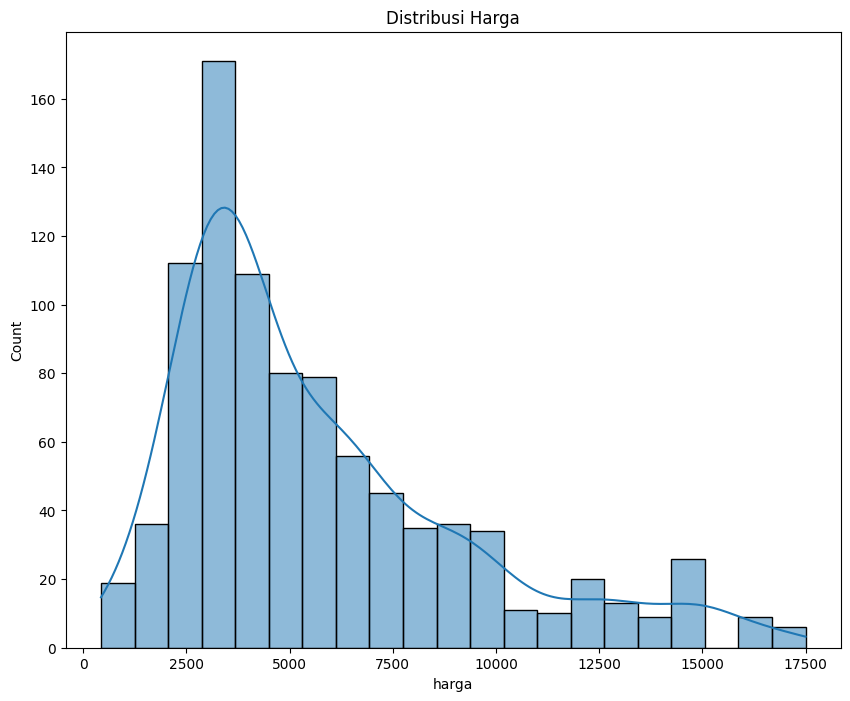

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['harga'], kde=True)
plt.title('Distribusi Harga')
plt.show()

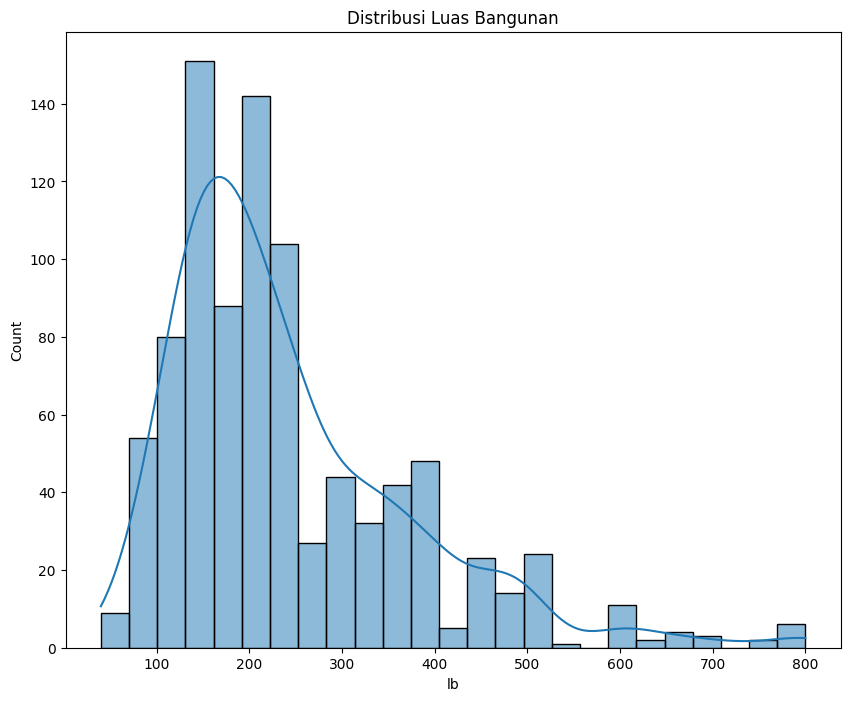

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['lb'], kde=True)
plt.title('Distribusi Luas Bangunan')
plt.show()

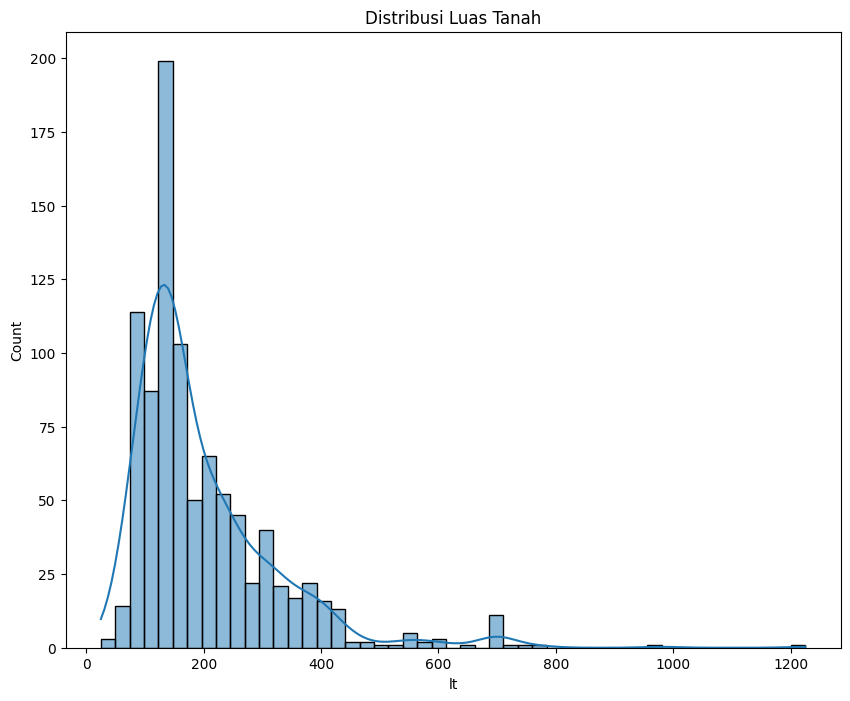

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['lt'], kde=True)
plt.title('Distribusi Luas Tanah')
plt.show()

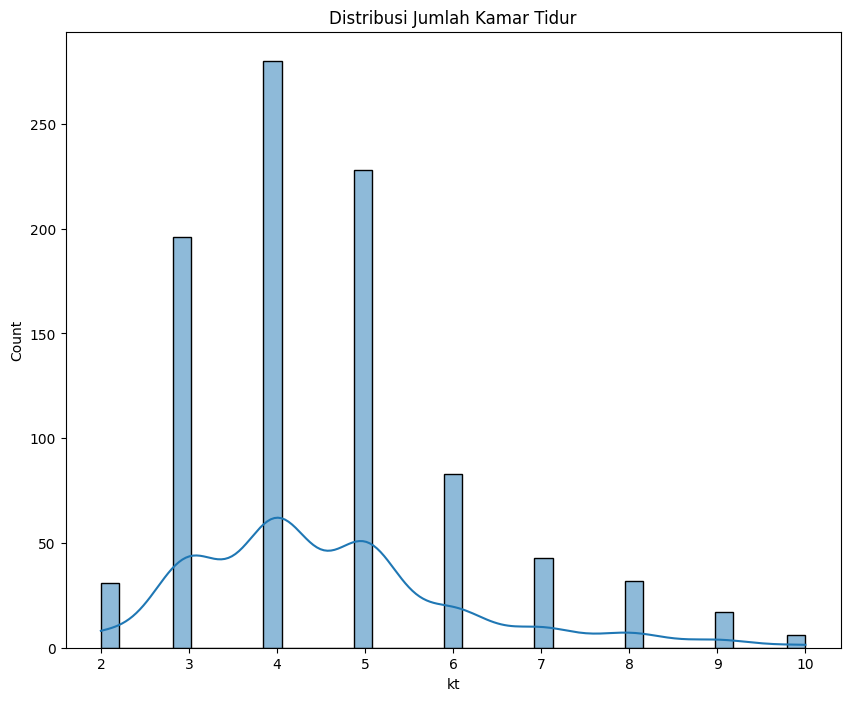

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['kt'], kde=True)
plt.title('Distribusi Jumlah Kamar Tidur')
plt.show()

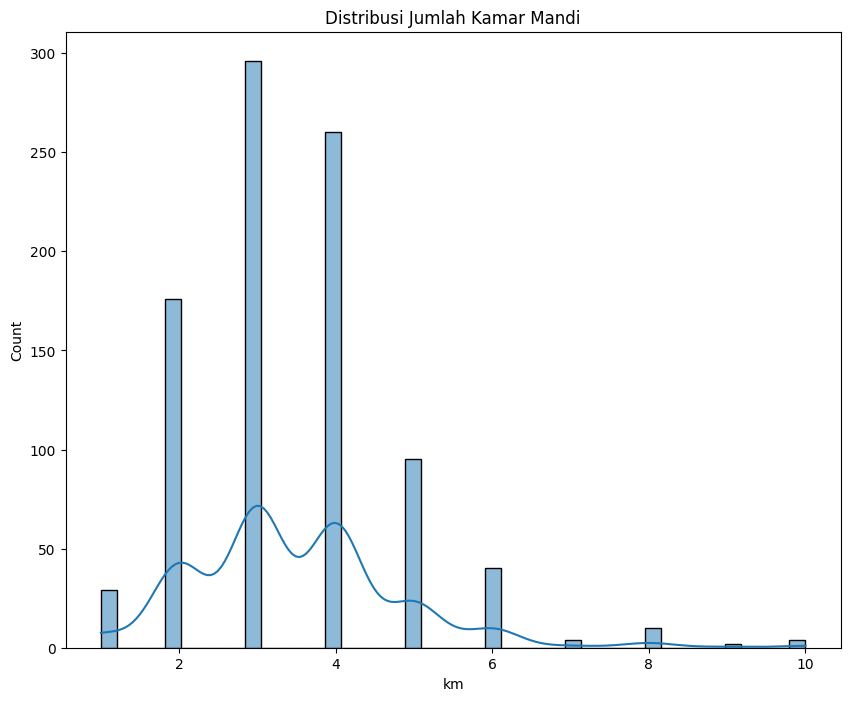

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['km'], kde=True)
plt.title('Distribusi Jumlah Kamar Mandi')
plt.show()

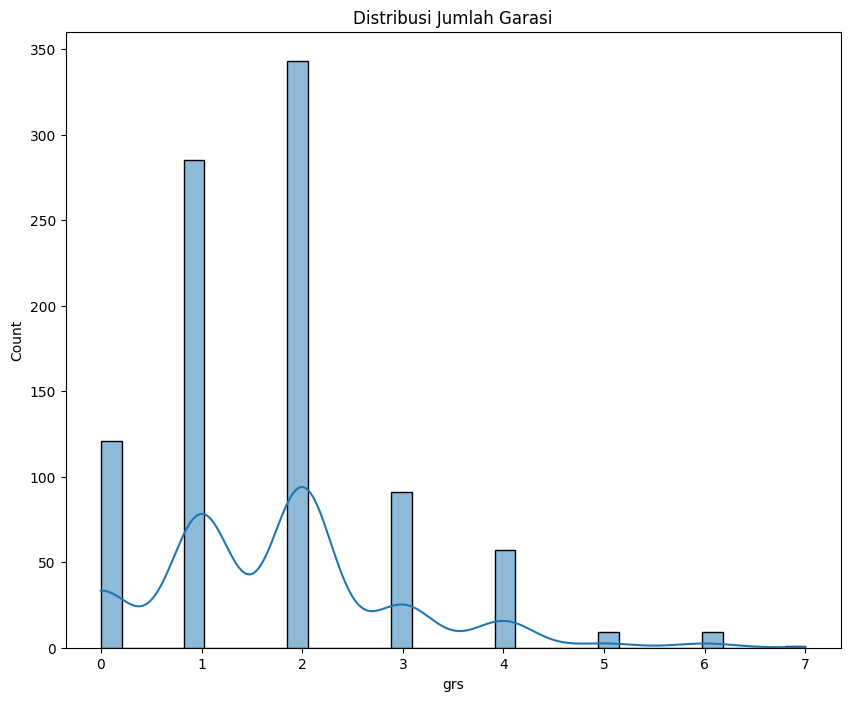

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['grs'], kde=True)
plt.title('Distribusi Jumlah Garasi')
plt.show()

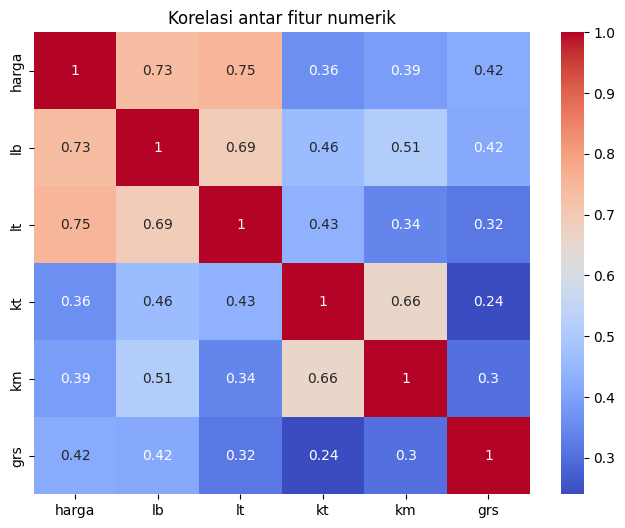

In [ ]:
numeric = ['harga', 'lb', 'lt', 'kt', 'km', 'grs']

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur numerik')
plt.show()

### **Multivariate Analysis**

Menjelaskan hubungan antar variable

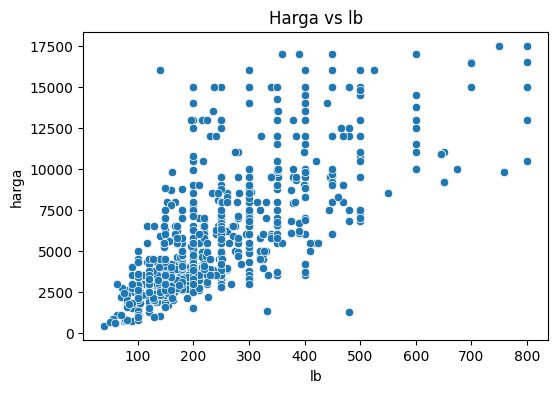

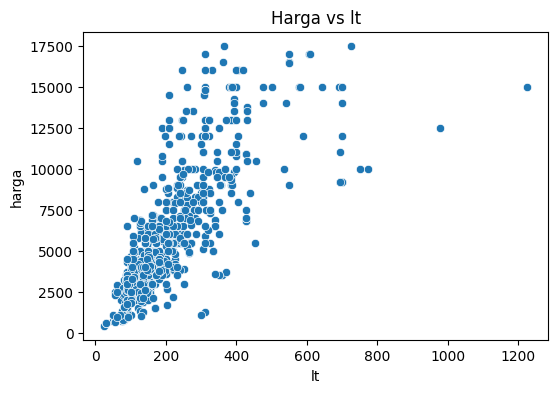

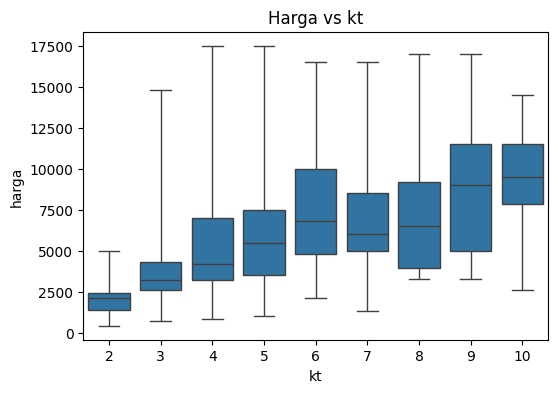

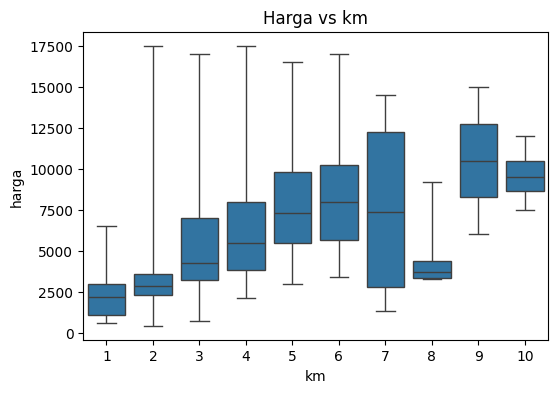

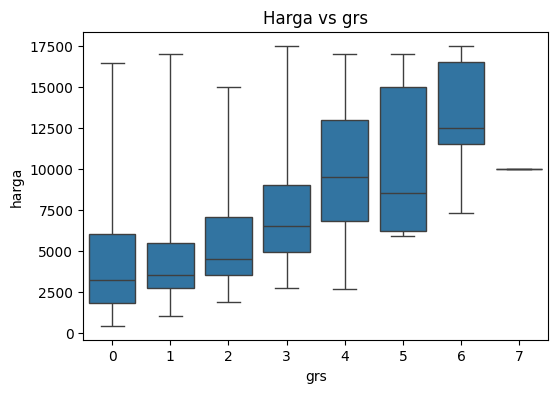

In [ ]:
# Scatterplot untuk fitur kontinu
for kolom in ['lb', 'lt']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[kolom], y=df['harga'])
    plt.title(f'Harga vs {kolom}')
    plt.show()

# Boxplot untuk fitur kategori (jumlah kamar, garasi)
for kolom in ['kt', 'km', 'grs']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[kolom], y=df['harga'], whis=[0, 100])
    plt.title(f'Harga vs {kolom}')
    plt.show()

## **3. Data Preparation**

### **Pemilihan Fitur**

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df[['lb', 'lt', 'kt', 'km', 'grs']]
y = df['harga']

### **Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Total datasets: {len(X)}')
print(f'Total data Latih: {len(X_train)}')
print(f'Total data Uji: {len(X_test)}')

Total datasets: 916
Total data Latih: 732
Total data Uji: 184


### **Normalisasi**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **4. Pembuatan Model**

- **Linear Regression**

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

- **Decision Tree**

In [ ]:
# Decision Tree
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

- **Random Forest**

In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=7)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

- **Gradient Boosting**

In [ ]:
# Gradient Boosting
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

## **5. Evaluasi Model**

Evaluasi model menggunakan MAE, MSE, RMSE, R² Score untuk mengukur error atau kesalahan prediksi sebagai acuan kualitas model secara keseluruhan

In [ ]:
# Evaluasi dan simpan dalam DataFrame
results = []
models = [("Linear Regression", lr, y_pred_lr),
          ("Decision Tree", dt, y_pred_dt),
          ("Random Forest", rf, y_pred_rf),
          ("Gradient Boosting", gbr, y_pred_gbr)]

for name, model, y_pred in models:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, mse, rmse, r2])

eval_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])

# Tampilkan tabel evaluasi
eval_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,1291.123620,4.500612e+06,2121.464566,0.591316
1,Decision Tree,1030.987640,2.764451e+06,1662.663789,0.748970
2,Random Forest,964.934583,2.347286e+06,1532.085463,0.786852
3,Gradient Boosting,993.817080,2.392081e+06,1546.635427,0.782784


### **Plot Model Hasil Evaluasi**

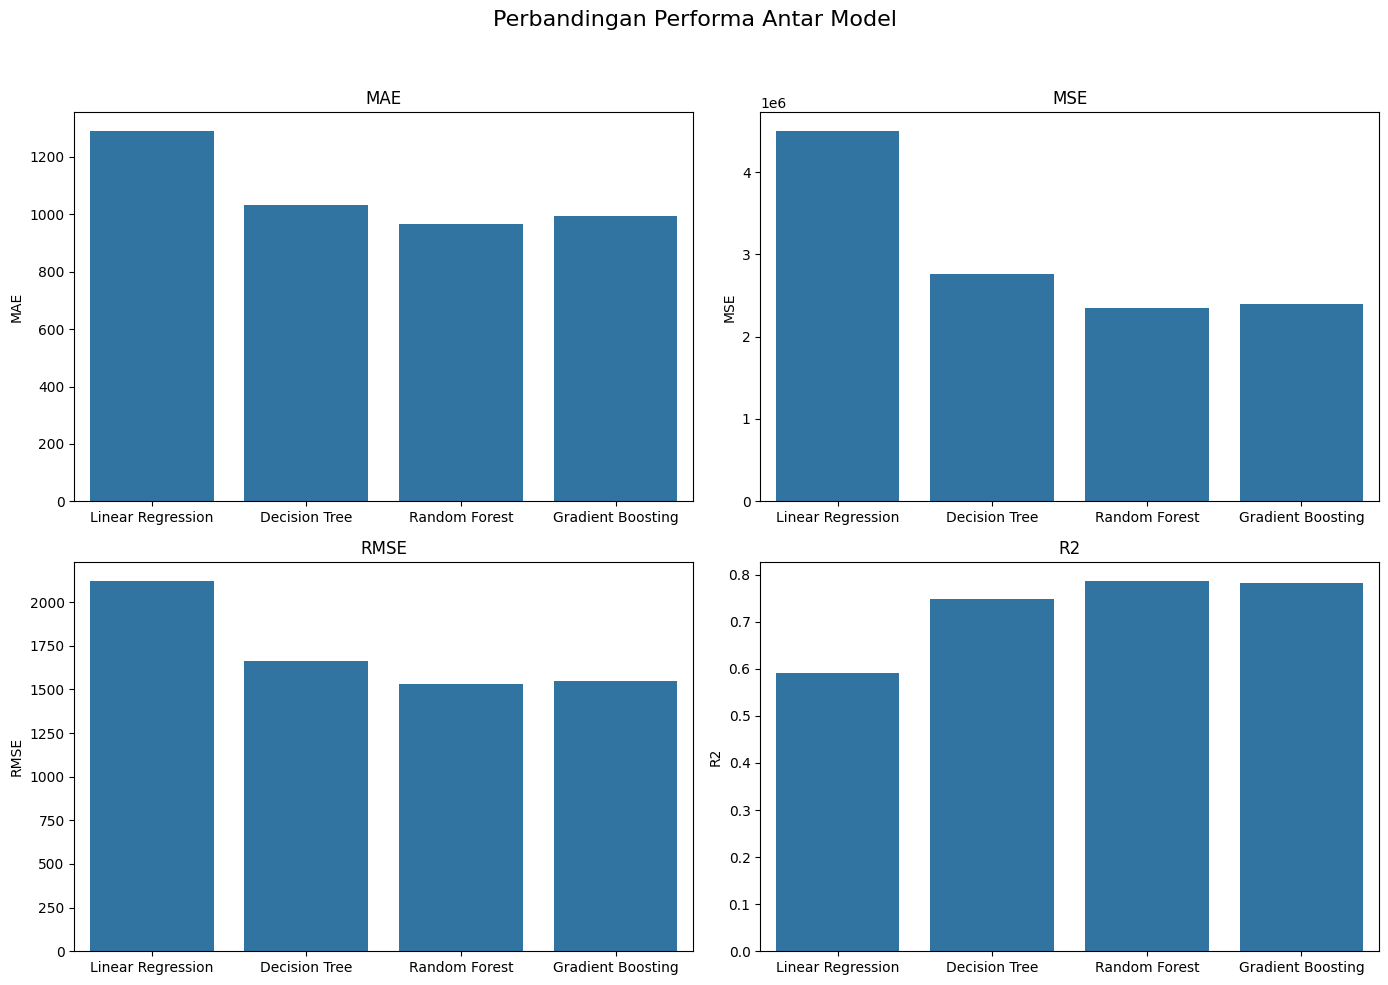

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Perbandingan Performa Antar Model', fontsize=16)

metrics = ["MAE", "MSE", "RMSE", "R2"]
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for metric, pos in zip(metrics, positions):
    ax = axes[pos]
    sns.barplot(x='Model', y=metric, data=eval_df, ax=ax)
    ax.set_title(f'{metric}')
    ax.set_xlabel('')
    ax.set_ylabel(metric)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Supaya tidak bertabrakan dengan suptitle
plt.show()

**Insight dari Evaluasi Model Prediksi Harga rumah**

- Berdasarkan metrik evaluasi, model Random Forest menunjukkan performa terbaik dibandingkan model lainnya.
- Hal ini terlihat dari nilai R² tertinggi, yang mendekati 1, menandakan bahwa model mampu menjelaskan proporsi variasi terbesar dari harga beras.
- MAE (Mean Absolute Error) dan RMSE (Root Mean Squared Error) untuk Random Forest juga yang paling kecil di antara ketiga model.

Berdasarkan evaluasi maka Random Forest adalah model yang paling handal


